In [36]:
import pandas as pd
import plotly.express as px
from mapping import event_type_map, event_type2_map, side_map, shot_place_map, shot_outcome_map, location_map, bodypart_map, assist_method_map, situation_map

In [37]:
# Load the data
data = pd.read_csv('data/events.csv')

In [38]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Print first 5 rows of the data, make sure that all columns are displayed
data.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


# Exploration for personal questions

In [39]:
# Filter the data for entries with event_type2 not NA
filtered_data = data[data['event_type2'].notna()]

# Map the event_type values to their descriptions
filtered_data['event_type_mapped'] = filtered_data['event_type'].map(event_type_map)

# Count the occurrences of each event_type
event_type_counts = filtered_data['event_type_mapped'].value_counts().reset_index()
event_type_counts.columns = ['Event Type', 'Count']

# Plot the data using Plotly
fig = px.bar(event_type_counts, x='Event Type', y='Count', title='Most Common event_type for Entries with event_type2 Not NA',
             labels={'Count': 'Count', 'Event Type': 'Event Type'}, template='plotly_dark')

fig.update_layout(title_font_size=24, xaxis_title_font_size=18, yaxis_title_font_size=18)
fig.show()


C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\3160825473.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
# Filter the data for entries with player missing
filtered_data = data[data['player'].isna()]

# Map the event_type values to their descriptions
filtered_data['event_type_mapped'] = filtered_data['event_type'].map(event_type_map)

# Count the occurrences of each event_type
event_type_counts = filtered_data['event_type_mapped'].value_counts().reset_index()
event_type_counts.columns = ['Event Type', 'Count']

# Plot the data using Plotly
fig = px.bar(event_type_counts, x='Event Type', y='Count', title='Most Common event_type for Entries with Missing Player',
             labels={'Count': 'Count', 'Event Type': 'Event Type'}, template='plotly_dark')

fig.update_layout(title_font_size=24, xaxis_title_font_size=18, yaxis_title_font_size=18)
fig.show()

C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\2991367020.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# Print some entries with event_type = 2 (Corner) or event_type = 11 (Penalty conceded) which have missing player
print(data[(data['event_type'] == 2) & (data['player'].isna())].head())
print(data[(data['event_type'] == 11) & (data['player'].isna())].head())

          id_odsp    id_event  sort_order  time  \
14079   I11QzFoT/  I11QzFoT91          91    62   
68080   dEBYxdpD/  dEBYxdpD51          51    51   
68124   dEBYxdpD/  dEBYxdpD95          95    89   
769057  f9SCIHj2/   f9SCIHj25           5     6   
769093  f9SCIHj2/  f9SCIHj241          41    41   

                                                     text  event_type  \
14079                                  Corner,  Cagliari.           2   
68080                               Corner,  Inter Milan.           2   
68124                               Corner,  Inter Milan.           2   
769057               Isco (Real Madrid) Corner Kick at 6'           2   
769093  James RodrA­guez (Real Madrid) Corner Kick at 41'           2   

        event_type2  side      event_team  opponent player player2 player_in  \
14079           NaN     1        Cagliari    Novara    NaN     NaN       NaN   
68080           NaN     1  Internazionale     Lecce    NaN     NaN       NaN   
68124         

In [44]:
# Filter the data for entries with player2 missing
filtered_data = data[data['player2'].isna()]

# Map the event_type values to their descriptions
filtered_data['event_type_mapped'] = filtered_data['event_type'].map(event_type_map)

# Count the occurrences of each event_type
event_type_counts = filtered_data['event_type_mapped'].value_counts().reset_index()
event_type_counts.columns = ['Event Type', 'Count']

# Plot the data using Plotly
fig = px.bar(event_type_counts, x='Event Type', y='Count', title='Most Common event_type for Entries with Missing Player2',
             labels={'Count': 'Count', 'Event Type': 'Event Type'}, template='plotly_dark')

fig.update_layout(title_font_size=24, xaxis_title_font_size=18, yaxis_title_font_size=18)
fig.show()

C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\2642934891.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# Filter the data for entries with player2 is valid
filtered_data = data[data['player2'].notna()]

# Map the event_type values to their descriptions
filtered_data['event_type_mapped'] = filtered_data['event_type'].map(event_type_map)

# Count the occurrences of each event_type
event_type_counts = filtered_data['event_type_mapped'].value_counts().reset_index()
event_type_counts.columns = ['Event Type', 'Count']

# Plot the data using Plotly
fig = px.bar(event_type_counts, x='Event Type', y='Count', title='Most Common event_type for Entries with Player2 Not NA',
             labels={'Count': 'Count', 'Event Type': 'Event Type'}, template='plotly_dark')

fig.update_layout(title_font_size=24, xaxis_title_font_size=18, yaxis_title_font_size=18)
fig.show()

C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\3483382604.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Filter the data for entries with location missing
filtered_data = data[data['location'].isna()]

# Map the event_type values to their descriptions
filtered_data['event_type_mapped'] = filtered_data['event_type'].map(event_type_map)

# Count the occurrences of each event_type
event_type_counts = filtered_data['event_type_mapped'].value_counts().reset_index()
event_type_counts.columns = ['Event Type', 'Count']

# Plot the data using Plotly
fig = px.bar(event_type_counts, x='Event Type', y='Count', title='Most Common event_type for Entries with Missing Location',
             labels={'Count': 'Count', 'Event Type': 'Event Type'}, template='plotly_dark')

fig.update_layout(title_font_size=24, xaxis_title_font_size=18, yaxis_title_font_size=18)
fig.show()

C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\3270912052.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
# Filter the data for entries with bodypart missing
filtered_data = data[data['bodypart'].isna()]

# Map the event_type values to their descriptions
filtered_data['event_type_mapped'] = filtered_data['event_type'].map(event_type_map)

# Count the occurrences of each event_type
event_type_counts = filtered_data['event_type_mapped'].value_counts().reset_index()
event_type_counts.columns = ['Event Type', 'Count']

# Plot the data using Plotly
fig = px.bar(event_type_counts, x='Event Type', y='Count', title='Most Common event_type for Entries with Missing Bodypart',
             labels={'Count': 'Count', 'Event Type': 'Event Type'}, template='plotly_dark')

fig.update_layout(title_font_size=24, xaxis_title_font_size=18, yaxis_title_font_size=18)
fig.show()

C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\443697391.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Check for missing and inconsistent values

Missing values summary:
 id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
dtype: int64

Missing Values (%):
 id_odsp           0.000000
id_event          0.000000
sort_order        0.000000
time              0.000000
text              0.000000
event_type        0.000000
event_type2      77.227317
side              0.000000
event_team        0.000000
opponent          0.000000
player            6.482403
player2          69.042804
player_in        94.504303
player_out       94.501859
shot_place       75.828180
shot_ou

C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\985937192.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\stoic\AppData\Local\Temp\ipykernel_17100\985937192.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




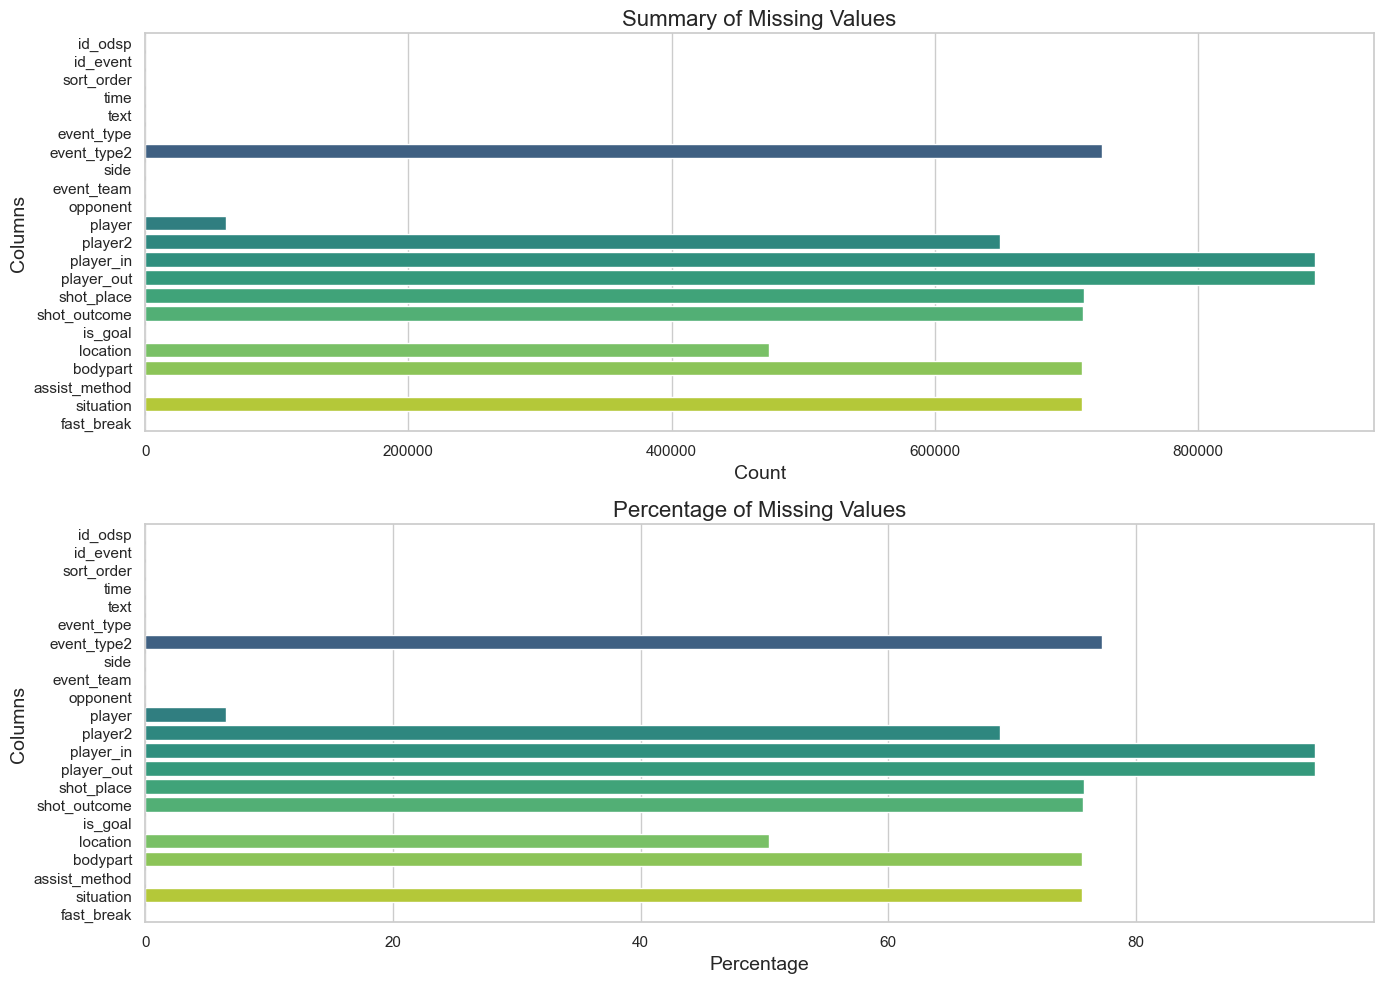

In [50]:
import seaborn as sns

# Summary of missing values
missing_summary = data.isnull().sum()
print("Missing values summary:\n", missing_summary)

# Percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values (%):\n", missing_percentage)
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot the summary of missing values
sns.barplot(x=missing_summary.values, y=missing_summary.index, ax=ax[0], palette="viridis")
ax[0].set_title('Summary of Missing Values', fontsize=16)
ax[0].set_xlabel('Count', fontsize=14)
ax[0].set_ylabel('Columns', fontsize=14)

# Plot the percentage of missing values
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, ax=ax[1], palette="viridis")
ax[1].set_title('Percentage of Missing Values', fontsize=16)
ax[1].set_xlabel('Percentage', fontsize=14)
ax[1].set_ylabel('Columns', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()